In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

In [119]:
# Cargar los datasets
df_arbrat = pd.read_csv(r'C:\Users\carlo\Documentos\proyectos\arbrat\data\raw\arbrat_2025.csv', encoding='utf-8')
df_parcs = pd.read_csv(r'C:\Users\carlo\Documentos\proyectos\arbrat\data\raw\arbrat_parcs.csv', encoding='utf-8')
df_zones = pd.read_csv(r'C:\Users\carlo\Documentos\proyectos\arbrat\data\raw\arbrat_zones.csv', encoding='utf-8')

C:\Users\carlo\AppData\Local\Temp\ipykernel_28216\2811239385.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_parcs = pd.read_csv(r'C:\Users\carlo\Documentos\proyectos\arbrat\data\raw\arbrat_parcs.csv', encoding='utf-8')


In [120]:
# Mostrar las primeras filas de cada dataset
print("🔍 Columnas en arbrat_2025:")
print(df_arbrat.info(), "\n")

print("📌 arbrat_2025.csv")
print(df_arbrat.head(), "\n")

🔍 Columnas en arbrat_2025:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146901 entries, 0 to 146900
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   codi               146901 non-null  object 
 1   x_etrs89           146901 non-null  float64
 2   y_etrs89           146901 non-null  float64
 3   latitud            146901 non-null  float64
 4   longitud           146901 non-null  float64
 5   tipus_element      146901 non-null  object 
 6   espai_verd         31033 non-null   object 
 7   adreca             146901 non-null  object 
 8   cat_especie_id     146901 non-null  int64  
 9   cat_nom_cientific  146901 non-null  object 
 10  cat_nom_castella   144079 non-null  object 
 11  cat_nom_catala     143852 non-null  object 
 12  categoria_arbrat   146844 non-null  object 
 13  data_plantacio     29387 non-null   object 
 14  tipus_aigua        6724 non-null    object 
 15  tipus_reg          14689

In [121]:
print("🔍 Columnas en arbrat_parcs:")
print(df_parcs.info(), "\n")

print("📌 arbrat_parcs.csv")
print(df_parcs.head(), "\n")


🔍 Columnas en arbrat_parcs:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34357 entries, 0 to 34356
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   codi               34357 non-null  object 
 1   x_etrs89           34357 non-null  float64
 2   y_etrs89           34357 non-null  float64
 3   latitud            34357 non-null  float64
 4   longitud           34357 non-null  float64
 5   tipus_element      34357 non-null  object 
 6   espai_verd         34239 non-null  object 
 7   adreca             34357 non-null  object 
 8   cat_especie_id     34357 non-null  int64  
 9   cat_nom_cientific  34357 non-null  object 
 10  cat_nom_castella   34023 non-null  object 
 11  cat_nom_catala     33996 non-null  object 
 12  categoria_arbrat   34306 non-null  object 
 13  data_plantacio     1295 non-null   object 
 14  tipus_aigua        697 non-null    object 
 15  tipus_reg          34349 non-null  object 

In [122]:
print("🔍 Columnas en arbrat_zones:")
print(df_zones.info(), "\n")
print("📌 arbrat_zones.csv")
print(df_zones.head(), "\n")


🔍 Columnas en arbrat_zones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43043 entries, 0 to 43042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   codi               43043 non-null  object 
 1   x_etrs89           43043 non-null  float64
 2   y_etrs89           43043 non-null  float64
 3   latitud            43043 non-null  float64
 4   longitud           43043 non-null  float64
 5   tipus_element      43043 non-null  object 
 6   espai_verd         40522 non-null  object 
 7   adreca             43043 non-null  object 
 8   cat_especie_id     43043 non-null  int64  
 9   cat_nom_cientific  43043 non-null  object 
 10  cat_nom_castella   42267 non-null  object 
 11  cat_nom_catala     42208 non-null  object 
 12  categoria_arbrat   42991 non-null  object 
 13  data_plantacio     3838 non-null   object 
 14  tipus_aigua        2903 non-null   object 
 15  tipus_reg          43019 non-null  object 

In [123]:
# Comprobamos si tienen columnas similares
print("Columnas en arbrat_2025:", df_arbrat.columns.tolist())
print("Columnas en arbrat_parcs:", df_parcs.columns.tolist())

# Si coinciden, concatenamos
df_union = pd.concat([df_arbrat, df_parcs], ignore_index=True)

# Eliminamos duplicados basándonos únicamente en la columna 'codi'
df_union = df_union.drop_duplicates(subset=['codi'])

print("Total de registros combinados sin duplicados:", len(df_union))


Columnas en arbrat_2025: ['codi', 'x_etrs89', 'y_etrs89', 'latitud', 'longitud', 'tipus_element', 'espai_verd', 'adreca', 'cat_especie_id', 'cat_nom_cientific', 'cat_nom_castella', 'cat_nom_catala', 'categoria_arbrat', 'data_plantacio', 'tipus_aigua', 'tipus_reg', 'geom', 'catalogacio', 'codi_barri', 'nom_barri', 'codi_districte', 'nom_districte']
Columnas en arbrat_parcs: ['codi', 'x_etrs89', 'y_etrs89', 'latitud', 'longitud', 'tipus_element', 'espai_verd', 'adreca', 'cat_especie_id', 'cat_nom_cientific', 'cat_nom_castella', 'cat_nom_catala', 'categoria_arbrat', 'data_plantacio', 'tipus_aigua', 'tipus_reg', 'geom', 'catalogacio', 'codi_barri', 'nom_barri', 'codi_districte', 'nom_districte']
Total de registros combinados sin duplicados: 181193


In [124]:
# Comprobamos si tienen columnas similares
print("Columnas en df_union:", df_union.columns.tolist())
print("Columnas en arbrat_zones:", df_zones.columns.tolist())

# Si coinciden, concatenamos
df_final = pd.concat([df_union, df_zones], ignore_index=True)

# Eliminamos duplicados basándonos únicamente en la columna 'codi'
df_final = df_final.drop_duplicates(subset=['codi'])

print("Total de registros combinados sin duplicados:", len(df_final))


Columnas en df_union: ['codi', 'x_etrs89', 'y_etrs89', 'latitud', 'longitud', 'tipus_element', 'espai_verd', 'adreca', 'cat_especie_id', 'cat_nom_cientific', 'cat_nom_castella', 'cat_nom_catala', 'categoria_arbrat', 'data_plantacio', 'tipus_aigua', 'tipus_reg', 'geom', 'catalogacio', 'codi_barri', 'nom_barri', 'codi_districte', 'nom_districte']
Columnas en arbrat_zones: ['codi', 'x_etrs89', 'y_etrs89', 'latitud', 'longitud', 'tipus_element', 'espai_verd', 'adreca', 'cat_especie_id', 'cat_nom_cientific', 'cat_nom_castella', 'cat_nom_catala', 'categoria_arbrat', 'data_plantacio', 'tipus_aigua', 'tipus_reg', 'geom', 'catalogacio', 'codi_barri', 'nom_barri', 'codi_districte', 'nom_districte']
Total de registros combinados sin duplicados: 224171


In [125]:
df_final.head().sort_index(ascending=True)

,codi,x_etrs89,y_etrs89,latitud,longitud,tipus_element,espai_verd,adreca,cat_especie_id,cat_nom_cientific,...,categoria_arbrat,data_plantacio,tipus_aigua,tipus_reg,geom,catalogacio,codi_barri,nom_barri,codi_districte,nom_districte
0,0000025AR,430270.562,4587637.998,41.437287,2.165353,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",2336,Fraxinus angustifolia 'Raywood',...,PRIMERA,2022-02-15,NaN,GOTEIG AVARIAT,POINT (430270.561661092 4587637.99844993),NaN,48.0,LA GUINEUETA,8.0,NOU BARRIS
1,0000028AR,430278.453,4587643.703,41.437339,2.165447,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",2336,Fraxinus angustifolia 'Raywood',...,PRIMERA,2022-02-15,NaN,GOTEIG AVARIAT,POINT (430278.452565526 4587643.70285161),NaN,48.0,LA GUINEUETA,8.0,NOU BARRIS
2,0000386AR,430035.239,4587693.836,41.437769,2.162530,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",126,Platanus × acerifolia,...,SEGONA,NaN,NaN,SENSE INFORMAR,POINT (430035.238676006 4587693.83631125),NaN,43.0,HORTA,7.0,HORTA - GUINARDÓ
3,0000387AR,430032.831,4587696.005,41.437788,2.162501,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",126,Platanus × acerifolia,...,SEGONA,NaN,NaN,SENSE INFORMAR,POINT (430032.831137134 4587696.00500337),NaN,43.0,HORTA,7.0,HORTA - GUINARDÓ
4,0000388AR,430030.367,4587698.393,41.437810,2.162471,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",126,Platanus × acerifolia,...,SEGONA,NaN,NaN,SENSE INFORMAR,POINT (430030.366746935 4587698.39336605),NaN,43.0,HORTA,7.0,HORTA - GUINARDÓ


In [126]:
df_final.columns

Index(['codi', 'x_etrs89', 'y_etrs89', 'latitud', 'longitud', 'tipus_element',
       'espai_verd', 'adreca', 'cat_especie_id', 'cat_nom_cientific',
       'cat_nom_castella', 'cat_nom_catala', 'categoria_arbrat',
       'data_plantacio', 'tipus_aigua', 'tipus_reg', 'geom', 'catalogacio',
       'codi_barri', 'nom_barri', 'codi_districte', 'nom_districte'],
      dtype='object')

In [127]:
df_arbres = df_final.copy()

In [128]:
import os

# Crear la carpeta 'clean' si no existe
clean_folder = r'C:\Users\carlo\Documentos\proyectos\arbrat\data\clean'
os.makedirs(clean_folder, exist_ok=True)

# Exportar el DataFrame a archivos CSV
try:
    df_final.to_csv(os.path.join(clean_folder, 'arbres_clean.csv'), index=False, encoding='utf-8')
except PermissionError:
    print("El archivo ya existe o está siendo utilizado. Ignorando la operación.")

El archivo ya existe o está siendo utilizado. Ignorando la operación.


# Análisis Exploratorio

In [129]:
df = df_arbres

## Tratamiento de valores nulos

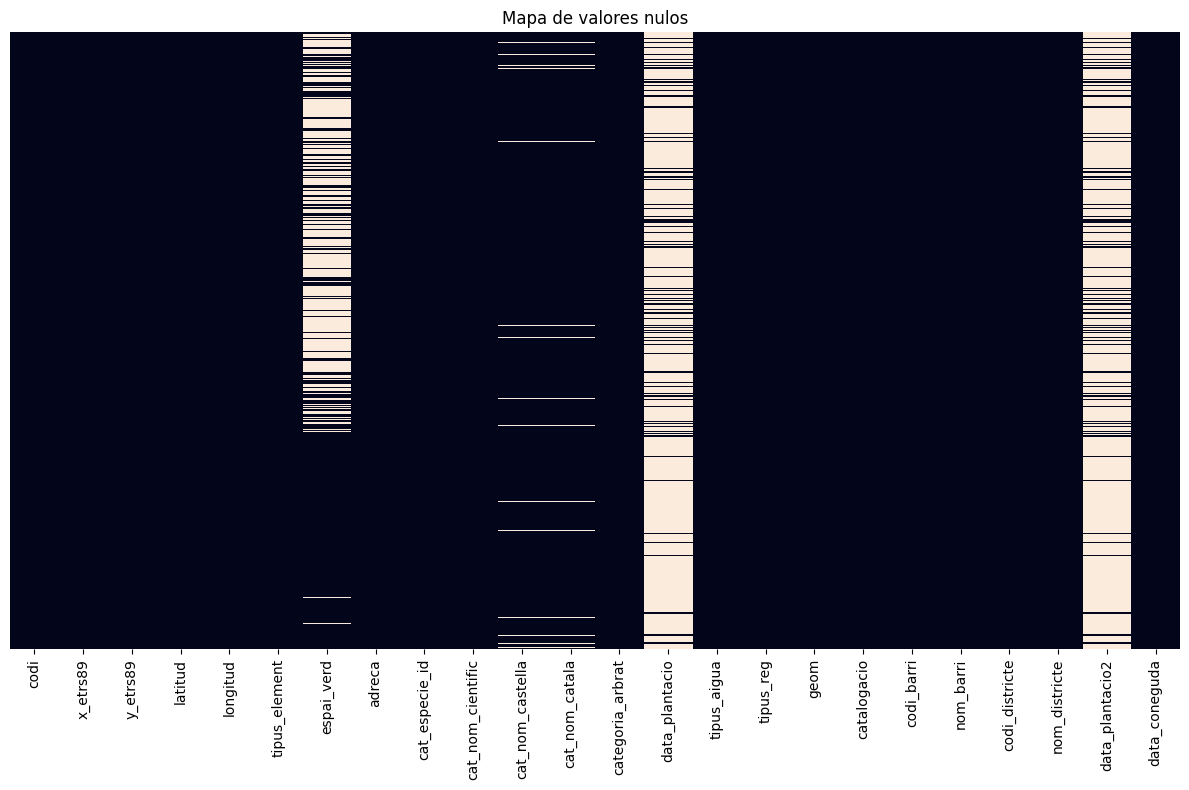

Distribución de valores nulos por fila:
2    112664
3     78011
1     18780
0     13173
4      1175
5       364
7         2
6         2
Name: count, dtype: int64


In [142]:
# Suponiendo que ya tienes los datos en un DataFrame llamado df
# Visualización de valores nulos
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Mapa de valores nulos')
plt.tight_layout()
plt.show()

# Cuantificar valores nulos por fila
nulos_por_fila = df.isnull().sum(axis=1)
print("Distribución de valores nulos por fila:")
print(nulos_por_fila.value_counts())

### Nulos Catalogacio

In [131]:
df.catalogacio.unique()
df.catalogacio.fillna("CAP", inplace=True)

C:\Users\carlo\AppData\Local\Temp\ipykernel_28216\78767803.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.catalogacio.fillna("CAP", inplace=True)


### Nulos tipus_aigua

In [132]:
df.tipus_aigua.unique()
df.tipus_aigua.fillna("N/A", inplace=True)
df.tipus_aigua.unique()

C:\Users\carlo\AppData\Local\Temp\ipykernel_28216\1707394818.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.tipus_aigua.fillna("N/A", inplace=True)


array(['N/A', 'POTABLE', 'FREÀTICA', 'REGENERADA'], dtype=object)

### Nulos data_plantacio

In [133]:
# Paso 1: Intentar convertir las fechas sin especificar el formato
df['data_plantacio2'] = pd.to_datetime(df['data_plantacio'], errors='coerce')

# Paso 2: Verificar cuántas fechas se pudieron convertir
fechas_validas = df['data_plantacio2'].notna().sum()
print(f"Fechas válidas convertidas: {fechas_validas} de {len(df)}")

# Paso 3: Inspeccionar las fechas no convertidas
fechas_invalidas = df[df['data_plantacio2'].isna()]['data_plantacio']
print("Fechas no convertidas (primeras 10):")
print(fechas_invalidas.head(10))

# Paso 4: Crear una columna explícita que indique si la fecha es conocida
df['data_coneguda'] = ~df['data_plantacio2'].isna()

# Para análisis descriptivos
print(f"Árboles con fecha conocida: {df['data_coneguda'].sum()} de {len(df)} ({df['data_coneguda'].mean()*100:.1f}%)")

Fechas válidas convertidas: 34501 de 224171
Fechas no convertidas (primeras 10):
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
10    NaN
11    NaN
14    NaN
15    NaN
19    NaN
Name: data_plantacio, dtype: object
Árboles con fecha conocida: 34501 de 224171 (15.4%)


### Nulos espai_verd

In [ ]:
print("Nulos iniciales en espai_verd:")
print(df.espai_verd.isna().sum())

118449


In [135]:
df.espai_verd.unique()

array(['Central de Nou Barris, Parc',
       'Valldaura, Pg. (Llucmajor, Pl. - Fabra i Puig, Pl.)',
       'Constància, Jardins ', ..., 'Via Augusta 373', 'Marina 122, c.',
       'Llull, c. (Fluvià, c. - Provençals, c.)'],
      shape=(1765,), dtype=object)

In [136]:
# Rellenar los valores nulos en 'espai_verd' basándose en coincidencias en la columna 'adreca'
df['espai_verd'] = df.groupby('adreca')['espai_verd'].transform(lambda x: x.ffill().bfill())

C:\Users\carlo\AppData\Local\Temp\ipykernel_28216\1162747924.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['espai_verd'] = df.groupby('adreca')['espai_verd'].transform(lambda x: x.ffill().bfill())


In [ ]:
print(f"Nulos finales en espai_verd: {df.espai_verd.isna().sum()} de {len(df)}")

Nulos finales en espai_verd: 97050 de 224171



### Nulos nom_cat y nom_cast

## Visualización

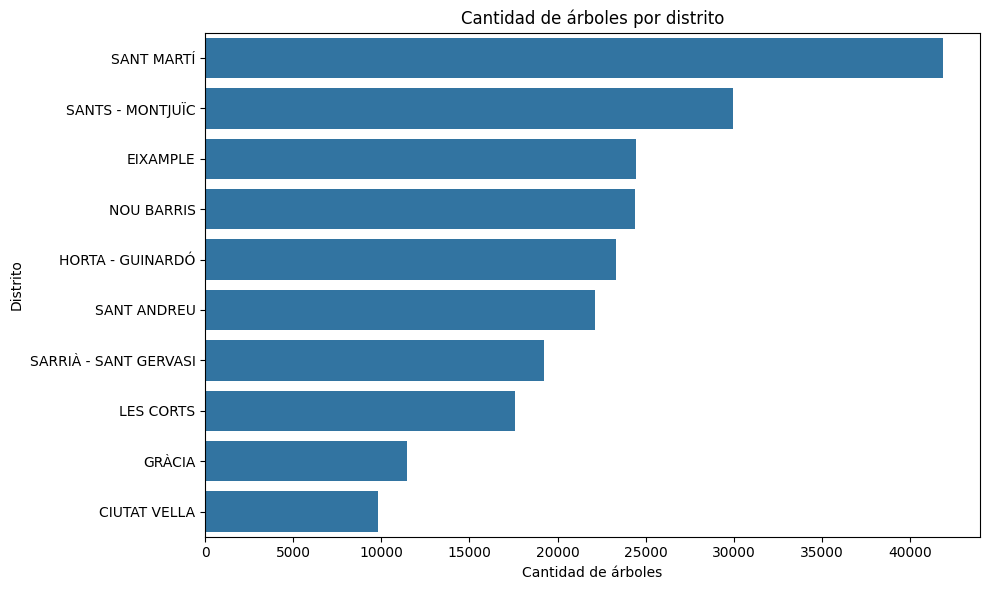

In [138]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_arbres, y='nom_districte', order=df_arbres['nom_districte'].value_counts().index)
plt.title('Cantidad de árboles por distrito')
plt.xlabel('Cantidad de árboles')
plt.ylabel('Distrito')
plt.tight_layout()
plt.show()



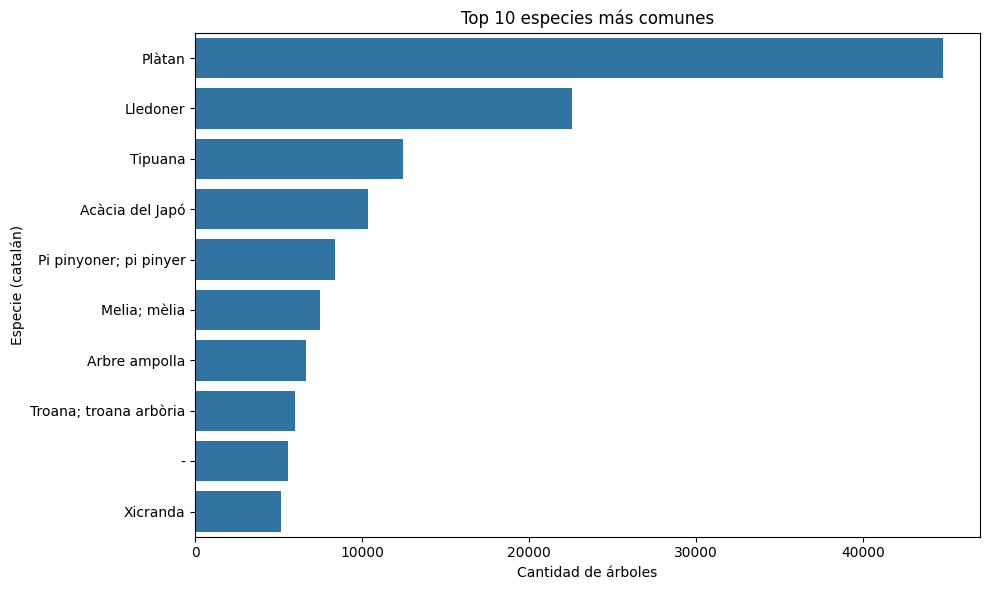

In [139]:
top_especies = df_arbres['cat_nom_catala'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_especies.values, y=top_especies.index)
plt.title('Top 10 especies más comunes')
plt.xlabel('Cantidad de árboles')
plt.ylabel('Especie (catalán)')
plt.tight_layout()
plt.show()


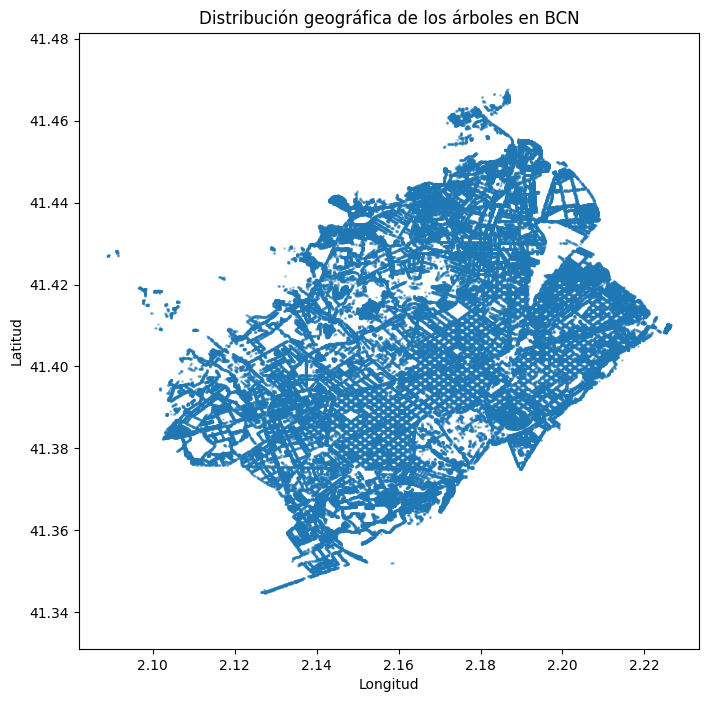

In [140]:
plt.figure(figsize=(8, 8))
plt.scatter(df_arbres['longitud'], df_arbres['latitud'], s=1, alpha=0.3)
plt.title('Distribución geográfica de los árboles en BCN')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.axis('equal')
plt.show()
